# 0. 목적  
### IMDB 영화 리뷰로 구성된 데이터를 이용하여 NLP 실습
##### [데이터출처](https://www.kaggle.com/ymanojkumar023/kumarmanoj-bag-of-words-meets-bags-of-popcorn?select=labeledTrainData.tsv)

# 1. 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/ba874/Desktop/OCL/study/dataset/nlp/labeledTrainData.tsv', header = 0, delimiter = '\t', quoting=3)

### 1.1 불러온 데이터 확인

In [3]:
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


# 2. 데이터 보기

In [4]:
df.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [6]:
df["sentiment"].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

##### 결측치는 없으며 긍정(df["sentiment"] = 1)과 부정(df["sentimnet"] = 0)이 같은 비율로 구성되어있다.

### 2.1 review에 소문자, 대문자, 온점과 특수문자( ', - )을 제외한 문자가 있는지 확인

In [7]:
from bs4 import BeautifulSoup as bs

In [8]:
soup = []

[beautifulsoup에서 사용 가능한 파서](https://brownbears.tistory.com/414)

In [9]:
df["review"][3]

'"It must be assumed that those who praised this film (\\"the greatest filmed opera ever,\\" didn\'t I read somewhere?) either don\'t care for opera, don\'t care for Wagner, or don\'t care about anything except their desire to appear Cultured. Either as a representation of Wagner\'s swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It\'s questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \\"about\\" should be allowed anywhere near a theatre or film studio; Syberberg, very fashionably, but without the smallest justification from Wagner\'s text, decided that Parsifal is \\"about\\" bisexual integration, so that the title character, in the latter stages, transmutes into a kind of beatnik babe, though one who continues to sing high tenor -- few if any of the actors in the film are the singers, and we

In [10]:
for i in range(len(df["review"])):
    soup.append(bs(df["review"][i], "html5lib"))

In [11]:
soup[3].get_text()

'"It must be assumed that those who praised this film (\\"the greatest filmed opera ever,\\" didn\'t I read somewhere?) either don\'t care for opera, don\'t care for Wagner, or don\'t care about anything except their desire to appear Cultured. Either as a representation of Wagner\'s swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.It\'s questionable that people with ideas as to what an opera (or, for that matter, a play, especially one by Shakespeare) is \\"about\\" should be allowed anywhere near a theatre or film studio; Syberberg, very fashionably, but without the smallest justification from Wagner\'s text, decided that Parsifal is \\"about\\" bisexual integration, so that the title character, in the latter stages, transmutes into a kind of beatnik babe, though one who continues to sing high tenor -- few if any of the actors in the film are the singers, and we get a doubl

In [12]:
import re

In [13]:
letter = []

In [14]:
for i in range(len(soup)):
    letter.append(re.sub("[.|0-9|a-z|A-Z|-|']", ' ', soup[i].get_text()))

In [15]:
letter[1]

'"\\"                             \\"                                                                                                                                                                                 ,                                       ,                                                  ,                                                     ,                                                                                                          ,                                                                                          \\"       \\"                                                                                        ,                      ,                                               \\"       \\"                                                                                      ,                                                                                 \\"       \\"                                 "'

여러 예외적인 문자들이 존재한다.

# 3. 데이터 클린징

### 3.1 review의 대문자를 소문자로 바꾸고 예외적인 문자들 제거

In [16]:
letter = []

In [17]:
for i in range(len(soup)):
    letter.append(re.sub("[^.|0-9|a-z|A-Z|-|']", ' ', soup[i].get_text()))

In [18]:
lower = []

In [19]:
for i in range(len(letter)):
    lower.append(letter[i].lower())

In [20]:
lower[1]

"   the classic war of the worlds   by timothy hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate h. g. wells' classic book. mr. hines succeeds in doing so. i  and those who watched his film with me  appreciated the fact that it was not the standard  predictable hollywood fare that comes out every year  e.g. the spielberg version with tom cruise that had only the slightest resemblance to the book. obviously  everyone looks for different things in a movie. those who envision themselves as amateur   critics   look only to criticize everything they can. others rate a movie on more important bases like being entertained  which is why most people never agree with the   critics  . we enjoyed the effort mr. hines put into being faithful to h.g. wells' classic novel  and we found it to be very entertaining. this made it easy to overlook what the   critics   perceive to be its shortcomings. "

### 3.2 토큰화 후 불용어 및 길이가 짧은 단어 제거

In [21]:
from nltk.tokenize import TreebankWordTokenizer

In [22]:
tokenizer = TreebankWordTokenizer()

In [23]:
token = []

In [24]:
for i in range(len(lower)):
    token.append(tokenizer.tokenize(lower[i]))

In [25]:
from nltk.corpus import stopwords

In [26]:
stword = stopwords.words('english')

In [27]:
words = []

In [28]:
for i in range(len(token)):
    words.append([])
    for j in range(len(token[i])):
        if token[i][j] not in stword:
            if len(token[i][j]) > 2:
                words[i].append(token[i][j])

### 3.3 딕셔너리 만들어 문장의 단어들 숫자로 치환

[딕셔너리 관련 링크](https://wikidocs.net/16)

In [29]:
dict_review = {}
value = 0

In [30]:
for i in range(len(words)):
    for j in words[i]:
        if j not in dict_review.keys():
            dict_review[j] = value
            value += 1

In [31]:
len(dict_review)

129718

In [32]:
len(dict_review)

129718

In [33]:
new_words = words

In [34]:
import numpy as np

In [35]:
frequency = np.zeros(len(dict_review))

In [36]:
len(frequency)

129718

In [37]:
for i in range(len(new_words)):
    for j in range(len(new_words[i])):
        temp = dict_review[new_words[i][j]]
        new_words[i][j] = temp
        frequency[temp] +=1

### 3.4 단어의 빈도가 0.02%이하인 단어 사전에서 제거 및 토큰화 된 list에서도 제거

In [38]:
reverse_dict = dict([(value, key) for (key, value) in dict_review.items()])

In [39]:
len(reverse_dict)

129718

In [40]:
for i in range(len(frequency)):
    if frequency[i] <= 26:
        del reverse_dict[i]

In [41]:
len(reverse_dict)

11402

In [42]:
len(new_words)

25000

In [43]:
frequen_word = []

In [44]:
for i in range(len(new_words)):
    frequen_word.append([])
    for j in range(len(new_words[i])):
        if new_words[i][j] in reverse_dict.keys():
            frequen_word[i].append(new_words[i][j])

### 3.5 bag-of-words 방법 적용

In [45]:
frequen_dict = {}
key = 0

In [46]:
for i in range(len(frequen_word)):
    for j in frequen_word[i]:
        value = reverse_dict[j]
        if value not in frequen_dict.values():
            frequen_dict[key] = value
            key += 1

In [47]:
for i in range(len(frequen_word)):
    for j in range(len(frequen_word[i])):
        temp = reverse_dict[frequen_word[i][j]]
        frequen_word[i][j] = temp

In [48]:
rev_freq_dict = dict([(value, key) for (key, value) in frequen_dict.items()])

In [49]:
for i in range(len(frequen_word)):
    for j in range(len(frequen_word[i])):
        temp = rev_freq_dict[frequen_word[i][j]]
        frequen_word[i][j] = temp

In [50]:
def bag_of_words(sequences, dimension=len(rev_freq_dict)):
    results = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        for j in range(len(sequences[i])):
            temp = sequences[i][j]
            if results[i][temp] == 0:
                results[i][temp] = 1
            else:
                results[i][temp] += 1
    return results

In [51]:
x = bag_of_words(frequen_word)

In [52]:
y = np.array(df["sentiment"])

### 3.6 One-hot encoding

In [53]:
def one_hot(sequences, dimension=len(rev_freq_dict)):
    results = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        for j in range(len(sequences[i])):
            temp = sequences[i][j]
            results[i][temp] = 1
    return results

In [54]:
x_oh = one_hot(frequen_word)

In [55]:
y_oh = np.array(df["sentiment"])

### 3.7 TF-IDF

In [56]:
from math import log

In [57]:
n = len(frequen_word)

In [58]:
x[0].sum()

188.0

In [59]:
x_idf = []

In [60]:
for i in range(len(x)):
    x_idf.append([])
    for j in range(len(x[i])):
        if x[i][j] == 0:
            x_idf[i].append(0)
        else:
            x_idf[i].append(x[i][j]*log(n/(x[i].sum() + 1)))
            x_idf[i][j] = round(x_idf[i][j], 4).astype(np.float32)
    if i % 5000 == 0:
        print(i)

0
5000
10000
15000
20000


In [61]:
y_idf = np.array(df["sentiment"])

# 4. 모델적용

In [62]:
from keras import models
from keras import layers

In [63]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(rev_freq_dict),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [64]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
model_oh = models.Sequential()
model_oh.add(layers.Dense(16, activation='relu', input_shape=(len(rev_freq_dict),)))
model_oh.add(layers.Dense(16, activation='relu'))
model_oh.add(layers.Dense(1, activation='sigmoid'))
model_oh.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
model_idf = models.Sequential()
model_idf.add(layers.Dense(16, activation='relu', input_shape=(len(rev_freq_dict),)))
model_idf.add(layers.Dense(16, activation='relu'))
model_idf.add(layers.Dense(1, activation='sigmoid'))
model_idf.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
x_train = x[:15000]
y_train = y[:15000]
x_test = x[15000:]
y_test = y[15000:]

In [68]:
x_train_oh = x_oh[:15000]
y_train_oh = y_oh[:15000]
x_test_oh = x_oh[15000:]
y_test_oh = y_oh[15000:]

In [69]:
x_train_idf = np.asarray(x_idf[:15000])
y_train_idf = np.asarray(y_idf[:15000])
x_test_idf = np.asarray(x_idf[15000:])
y_test_idf = np.asarray(y_idf[15000:])

In [70]:
len(x_train)

15000

In [71]:
y_train.sum()

7487

In [72]:
y_test.sum()

5013

In [73]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [74]:
x_val_oh = x_train_oh[:5000]
partial_x_train_oh = x_train_oh[5000:]
y_val_oh = y_train_oh[:5000]
partial_y_train_oh = y_train_oh[5000:]

In [75]:
x_val_idf = x_train_idf[:5000]
partial_x_train_idf = x_train_idf[5000:]
y_val_idf = y_train_idf[:5000]
partial_y_train_idf = y_train_idf[5000:]

In [76]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data=(x_val, y_val))

Epoch 1/20
20/20 [==============================] - 8s 266ms/step - loss: 0.6206 - accuracy: 0.6840 - val_loss: 0.4569 - val_accuracy: 0.8554
Epoch 2/20
20/20 [==============================] - 3s 138ms/step - loss: 0.3778 - accuracy: 0.9073 - val_loss: 0.3725 - val_accuracy: 0.8648
Epoch 3/20
20/20 [==============================] - 3s 133ms/step - loss: 0.2664 - accuracy: 0.9370 - val_loss: 0.3353 - val_accuracy: 0.8722
Epoch 4/20
20/20 [==============================] - 3s 140ms/step - loss: 0.1950 - accuracy: 0.9560 - val_loss: 0.3264 - val_accuracy: 0.8736
Epoch 5/20
20/20 [==============================] - 3s 131ms/step - loss: 0.1453 - accuracy: 0.9672 - val_loss: 0.3418 - val_accuracy: 0.8658
Epoch 6/20
20/20 [==============================] - 3s 138ms/step - loss: 0.1093 - accuracy: 0.9773 - val_loss: 0.3397 - val_accuracy: 0.8740
Epoch 7/20
20/20 [==============================] - 3s 135ms/step - loss: 0.0832 - accuracy: 0.9828 - val_loss: 0.3694 - val_accuracy: 0.8734
Epoch 

In [77]:
history_oh = model_oh.fit(partial_x_train_oh, partial_y_train_oh, epochs = 20, batch_size = 512, validation_data=(x_val_oh, y_val_oh))

Epoch 1/20
20/20 [==============================] - 7s 190ms/step - loss: 0.6245 - accuracy: 0.6877 - val_loss: 0.4593 - val_accuracy: 0.8422
Epoch 2/20
20/20 [==============================] - 3s 131ms/step - loss: 0.3805 - accuracy: 0.8954 - val_loss: 0.3614 - val_accuracy: 0.8652
Epoch 3/20
20/20 [==============================] - 2s 129ms/step - loss: 0.2623 - accuracy: 0.9312 - val_loss: 0.3339 - val_accuracy: 0.8660
Epoch 4/20
20/20 [==============================] - 2s 129ms/step - loss: 0.1979 - accuracy: 0.9490 - val_loss: 0.3105 - val_accuracy: 0.8742
Epoch 5/20
20/20 [==============================] - 2s 125ms/step - loss: 0.1473 - accuracy: 0.9626 - val_loss: 0.3160 - val_accuracy: 0.8712
Epoch 6/20
20/20 [==============================] - 2s 127ms/step - loss: 0.1081 - accuracy: 0.9763 - val_loss: 0.3255 - val_accuracy: 0.8708
Epoch 7/20
20/20 [==============================] - 2s 130ms/step - loss: 0.0883 - accuracy: 0.9779 - val_loss: 0.3422 - val_accuracy: 0.8690
Epoch 

In [78]:
history_idf = model_idf.fit(partial_x_train_idf, partial_y_train_idf, epochs = 20, batch_size = 512, validation_data=(x_val_idf, y_val_idf))

Epoch 1/20
20/20 [==============================] - 19s 204ms/step - loss: 0.6705 - accuracy: 0.6289 - val_loss: 0.4090 - val_accuracy: 0.8364
Epoch 2/20
20/20 [==============================] - 3s 137ms/step - loss: 0.2849 - accuracy: 0.9020 - val_loss: 0.3416 - val_accuracy: 0.8630
Epoch 3/20
20/20 [==============================] - 3s 139ms/step - loss: 0.1508 - accuracy: 0.9578 - val_loss: 0.4131 - val_accuracy: 0.8498
Epoch 4/20
20/20 [==============================] - 3s 134ms/step - loss: 0.0933 - accuracy: 0.9792 - val_loss: 0.3857 - val_accuracy: 0.8632
Epoch 5/20
20/20 [==============================] - 3s 139ms/step - loss: 0.0519 - accuracy: 0.9926 - val_loss: 0.4494 - val_accuracy: 0.8602
Epoch 6/20
20/20 [==============================] - 3s 134ms/step - loss: 0.0314 - accuracy: 0.9958 - val_loss: 0.5255 - val_accuracy: 0.8544
Epoch 7/20
20/20 [==============================] - 3s 131ms/step - loss: 0.0211 - accuracy: 0.9977 - val_loss: 0.4890 - val_accuracy: 0.8602
Epoch

In [79]:
import matplotlib.pyplot as plt

In [80]:
history_dict = history.history

In [81]:
history_dict_oh = history_oh.history

In [82]:
history_dict_idf = history_idf.history

In [83]:
acc = history_dict['accuracy']

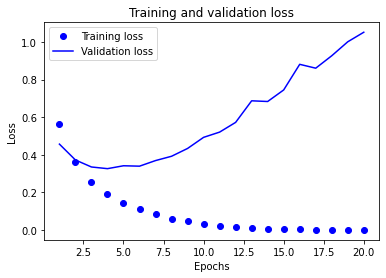

In [84]:
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

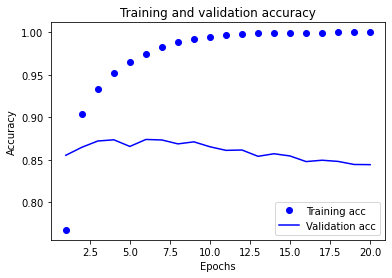

In [85]:
plt.clf()
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [86]:
acc_oh = history_dict['accuracy']

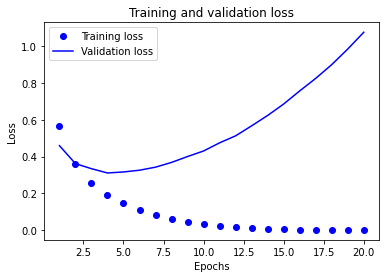

In [87]:
plt.clf()
loss_values_oh = history_dict_oh['loss'] 
val_loss_values_oh = history_dict_oh['val_loss']
epochs_oh = range(1, len(acc_oh) + 1)
plt.plot(epochs_oh, loss_values_oh, 'bo', label='Training loss') 
plt.plot(epochs_oh, val_loss_values_oh, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

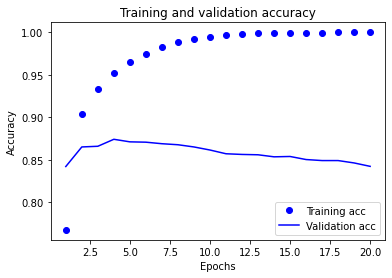

In [88]:
plt.clf()
val_acc_oh = history_dict_oh['val_accuracy']
plt.plot(epochs_oh, acc_oh, 'bo', label='Training acc') 
plt.plot(epochs_oh, val_acc_oh, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [89]:
acc_idf = history_dict_idf['accuracy']

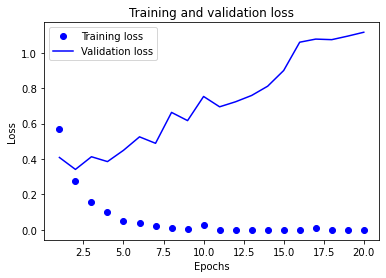

In [90]:
plt.clf()
loss_values_idf = history_dict_idf['loss'] 
val_loss_values_idf = history_dict_idf['val_loss']
epochs_idf = range(1, len(acc_idf) + 1)
plt.plot(epochs_idf, loss_values_idf, 'bo', label='Training loss') 
plt.plot(epochs_idf, val_loss_values_idf, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

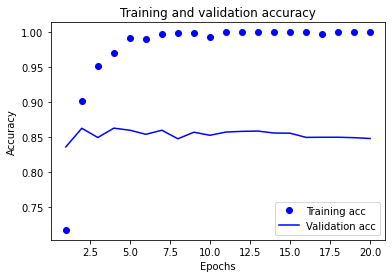

In [91]:
plt.clf()
val_acc_idf = history_dict_idf['val_accuracy']
plt.plot(epochs_idf, acc_idf, 'bo', label='Training acc') 
plt.plot(epochs_idf, val_acc_idf, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [92]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(rev_freq_dict),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [93]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
30/30 [==============================] - 4s 23ms/step - loss: 0.5683 - accuracy: 0.7350
Epoch 2/4
30/30 [==============================] - 1s 24ms/step - loss: 0.2848 - accuracy: 0.9154
Epoch 3/4
30/30 [==============================] - 1s 24ms/step - loss: 0.1979 - accuracy: 0.9416
Epoch 4/4
30/30 [==============================] - 1s 22ms/step - loss: 0.1418 - accuracy: 0.9597


In [95]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 2ms/step - loss: 0.3224 - accuracy: 0.8786


In [96]:
results

[0.32244497537612915, 0.878600001335144]

In [97]:
bow_x_train = model.predict(x_train)

In [98]:
bow_x_pred = model.predict(x_test)

In [99]:
bow_x_pred

array([[0.9022555 ],
       [0.60505617],
       [0.05605876],
       ...,
       [0.59618485],
       [0.08169729],
       [0.989061  ]], dtype=float32)

In [100]:
model_oh = models.Sequential()
model_oh.add(layers.Dense(16, activation='relu', input_shape=(len(rev_freq_dict),)))
model_oh.add(layers.Dense(16, activation='relu'))
model_oh.add(layers.Dense(1, activation='sigmoid'))
model_oh.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
model_oh.fit(x_train_oh, y_train_oh, epochs=5, batch_size=512)

Epoch 1/5
30/30 [==============================] - 5s 23ms/step - loss: 0.5811 - accuracy: 0.7282
Epoch 2/5
30/30 [==============================] - 1s 23ms/step - loss: 0.3059 - accuracy: 0.9061
Epoch 3/5
30/30 [==============================] - 1s 24ms/step - loss: 0.2088 - accuracy: 0.9373
Epoch 4/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1541 - accuracy: 0.9551
Epoch 5/5
30/30 [==============================] - 1s 23ms/step - loss: 0.1165 - accuracy: 0.9684


In [102]:
results_oh = model_oh.evaluate(x_test_oh,y_test_oh)

313/313 [==============================] - 3s 2ms/step - loss: 0.3479 - accuracy: 0.8690


In [103]:
results_oh

[0.3478933870792389, 0.8690000176429749]

In [104]:
oh_x_train = model.predict(x_train_oh)

In [105]:
oh_x_pred = model_oh.predict(x_test_oh)

In [106]:
model_idf = models.Sequential()
model_idf.add(layers.Dense(16, activation='relu', input_shape=(len(rev_freq_dict),)))
model_idf.add(layers.Dense(16, activation='relu'))
model_idf.add(layers.Dense(1, activation='sigmoid'))
model_idf.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [107]:
model_idf.fit(x_train_idf, y_train_idf, epochs=3, batch_size=512)

Epoch 1/3
30/30 [==============================] - 4s 22ms/step - loss: 0.5417 - accuracy: 0.7174
Epoch 2/3
30/30 [==============================] - 1s 23ms/step - loss: 0.2138 - accuracy: 0.9282
Epoch 3/3
30/30 [==============================] - 1s 21ms/step - loss: 0.1301 - accuracy: 0.9627


In [108]:
results_idf = model_idf.evaluate(x_test_idf,y_test_idf)

313/313 [==============================] - 3s 2ms/step - loss: 0.3280 - accuracy: 0.8734


In [109]:
results_idf

[0.32795679569244385, 0.8733999729156494]

In [110]:
idf_x_train = model.predict(x_train_idf)

In [111]:
idf_x_pred = model_idf.predict(x_test_idf)

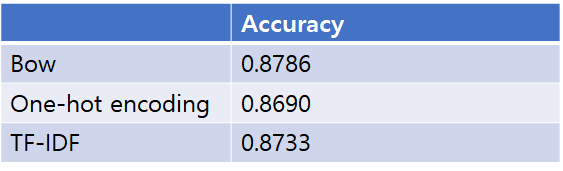

##### 앙상블 사용

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, auc

In [113]:
bow = np.ravel(bow_x_train)
oh = np.ravel(oh_x_train)
idf = np.ravel(idf_x_train)

In [114]:
x_train_ml = pd.DataFrame([bow, oh, idf])

In [115]:
x_train_ml = x_train_ml.transpose()

In [116]:
x_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15000 non-null  float64
 1   1       15000 non-null  float64
 2   2       15000 non-null  float64
dtypes: float64(3)
memory usage: 351.7 KB


In [117]:
y_train_ml = y_train

In [118]:
bow_pred = np.ravel(bow_x_pred)
oh_pred = np.ravel(oh_x_pred)
idf_pred = np.ravel(idf_x_pred)

In [119]:
x_test_ml = pd.DataFrame([bow_pred, oh_pred, idf_pred])

In [120]:
x_test_ml = x_test_ml.transpose()

In [121]:
y_test_ml = y_test

##### Logistic Regression

In [122]:
LR = LogisticRegression()

In [123]:
LR.fit(x_train_ml, y_train_ml)

LogisticRegression()

In [124]:
pred_rl = LR.predict(x_test_ml)

In [125]:
f1_score(y_test_ml, pred_rl)

0.8787665020659076

In [126]:
accuracy_score(y_test_ml, pred_rl)

0.8797

In [127]:
recall_score(y_test_ml, pred_rl)

0.8697386794334729

In [128]:
precision_score(y_test_ml, pred_rl)

0.8879837067209776

In [129]:
fpr, tpr, thresholds = roc_curve(y_test_ml, pred_rl)

In [132]:
auc(fpr, tpr)

0.8797259669475366

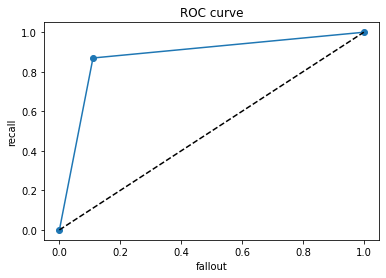

In [133]:
plt.clf()
plt.plot(fpr, tpr, 'o-', label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("fallout")
plt.ylabel("recall")
plt.title("ROC curve")
plt.show()

##### Random forest

In [134]:
RF = RandomForestClassifier()

In [135]:
RF.fit(x_train_ml, y_train_ml)

RandomForestClassifier()

In [136]:
pred_rf = RF.predict(x_test_ml)

In [137]:
f1_score(y_test_ml, pred_rf)

0.8748317631224765

In [138]:
accuracy_score(y_test_ml, pred_rf)

0.8698

In [139]:
recall_score(y_test_ml, pred_rf)

0.9076401356473169

In [140]:
precision_score(y_test_ml, pred_rf)

0.844312488402301

In [141]:
fpr, tpr, thresholds = roc_curve(y_test_ml, pred_rf)

In [142]:
auc(fpr, tpr)

0.8697013591811881

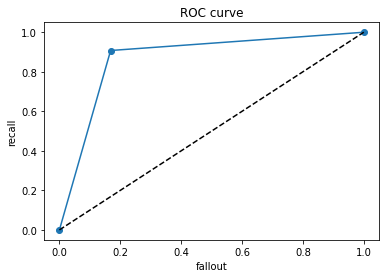

In [143]:
plt.clf()
plt.plot(fpr, tpr, 'o-', label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("fallout")
plt.ylabel("recall")
plt.title("ROC curve")
plt.show()

In [144]:
XGB = xgb.XGBClassifier()

In [145]:
XGB.fit(x_train_ml, y_train_ml)

C:\Users\ba874\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
pred_xgb = XGB.predict(x_test_ml)

In [147]:
f1_score(y_test_ml, pred_xgb)

0.8276462395543176

In [148]:
accuracy_score(y_test_ml, pred_xgb)

0.802

In [149]:
recall_score(y_test_ml, pred_xgb)

0.9483343307400758

In [150]:
precision_score(y_test_ml, pred_xgb)

0.7342084942084942

In [151]:
fpr, tpr, thresholds = roc_curve(y_test_ml, pred_xgb)

In [152]:
auc(fpr, tpr)

0.8016185389413233

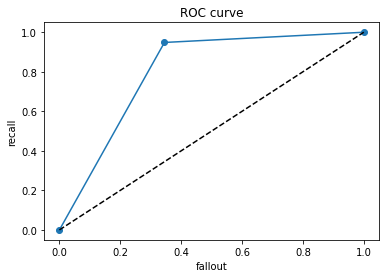

In [153]:
plt.clf()
plt.plot(fpr, tpr, 'o-', label="ROC Curve")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("fallout")
plt.ylabel("recall")
plt.title("ROC curve")
plt.show()

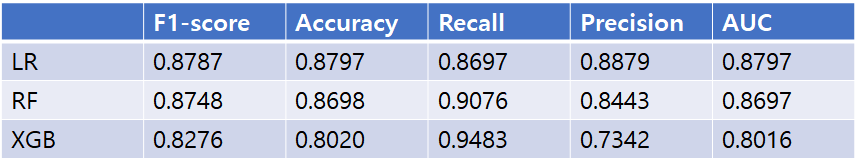